<a href="https://colab.research.google.com/github/OmegaJN/KNX/blob/master/Perebor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# читаем файл с данными
df_ri = pd.read_csv('RTS_30.csv', sep=';')
#print(df_ri)
df_sb = pd.read_csv('SBRF_30.csv', sep=';')
#print(df_sb)
df_lk = pd.read_csv('LKOH_30.csv', sep=';')
#print(df_lk)
df_out1 = df_ri.merge(df_sb, on = ['<DATE>', '<TIME>'])
#print(df_out1)
df = df_out1.merge(df_lk, on = ['<DATE>', '<TIME>'])
df = df.iloc[13000:,:]
print(df)
df.to_csv('out.csv', index=True)

         <DATE>  <TIME>  <OPEN>_x  <HIGH>_x   <LOW>_x  <CLOSE>_x  <VOL>_x  \
13000  20230131  170000   99280.0   99600.0   99170.0    99450.0     4587   
13001  20230131  173000   99450.0   99680.0   99300.0    99600.0     5353   
13002  20230131  180000   99600.0  100280.0   99600.0   100220.0     9660   
13003  20230131  183000  100230.0  100300.0   99930.0   100240.0     7289   
13004  20230131  190000  100250.0  100330.0  100130.0   100230.0     2444   
...         ...     ...       ...       ...       ...        ...      ...   
14535  20230414  220000   98590.0   98610.0   98570.0    98580.0      157   
14536  20230414  223000   98580.0   98600.0   98530.0    98550.0      185   
14537  20230414  230000   98570.0   98710.0   98560.0    98700.0      386   
14538  20230414  233000   98700.0   98760.0   98680.0    98690.0      207   
14539  20230415       0   98690.0   98900.0   98680.0    98770.0      976   

       <OPEN>_y  <HIGH>_y  <LOW>_y  <CLOSE>_y  <VOL>_y   <OPEN>   <HIGH>  \

    i1  i2  i3  i4  i5  i6  i7  i8  i9  out
0    1   1   1   0   1   1   1   1   1  1.0
1    1   1   1   1   1  -1   1  -1  -1  1.0
2    1   1   1   1   1   1   1   1   1  1.0
3    1   1   1   1   1   1  -1   1  -1 -1.0
4    1   1   1   0  -1  -1   1   1   1  1.0
5    1   1   1   0  -1   1  -1   1  -1  1.0
6    1   1   0   0   1  -1   1   1   1  0.0
7    1   1   0   0   1   1  -1  -1  -1  1.0
8    1   1   0   0  -1  -1  -1  -1  -1 -1.0
9    0   0   0   0  -1  -1   1   1  -1  1.0
10   0   1   0   0   1   1   1   1   1 -1.0
11   0   1   0   0  -1  -1   1  -1   1  1.0
12   0   0   0   0   1   1   1   1   1  1.0
13   0   1   0   0   1  -1  -1  -1  -1  1.0
14   1   1   0   0   1   1  -1   1  -1 -1.0
15   1   1   1   0  -1  -1  -1   1   1 -1.0
16   1   1   1   0   1  -1   1  -1   1  1.0
17   1   1   1   1   1  -1   1  -1  -1  1.0
18   1   1   1   1  -1   1   1   1   1  1.0
19   1   1   1   1   1   1   1   1   1 -1.0
20   1   1   1   0  -1  -1  -1  -1  -1 -1.0
21   1   1   1   0  -1  -1   1  

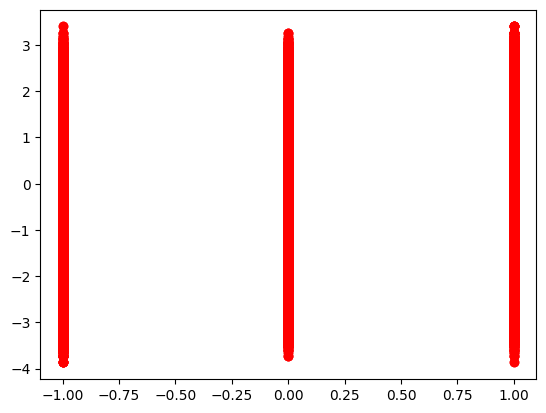

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# читаем файл с данными
df = pd.read_csv('data.txt', sep='\t')

# выбираем первые 1000 строк для подбора коэффициентов
df = df[:30]
print(df)
# инициализируем массивы для K и результатов
K_arr = np.zeros(9)
result_arr = np.zeros(len(df))

# проходимся циклически по возможным значениям K
for K1 in np.arange(-1, 1.1, 1):
    K_arr[0] = K1
    for K2 in np.arange(-1, 1.1, 1):
        K_arr[1] = K2
        for K3 in np.arange(-1, 1.1, 1):
            K_arr[2] = K3
            for K4 in np.arange(-1, 1.1, 1):
                K_arr[3] = K4
                for K5 in np.arange(-1, 1.1, 1):
                    K_arr[4] = K5
                    for K6 in np.arange(-1, 1.1, 1):
                        K_arr[5] = K6
                        for K7 in np.arange(-1, 1.1, 1):
                            K_arr[6] = K7
                            for K8 in np.arange(-1, 1.1, 1):
                                K_arr[7] = K8
                                for K9 in np.arange(-1, 1.1, 1):
                                    K_arr[8] = K9

                                    # вычисляем результат для каждой строки в df
                                    for i in range(len(df)):
                                        out = df.iloc[i, -1]
                                        input_vals = df.iloc[i, :-1].values
                                        output_val = np.mean(np.dot(K_arr, input_vals))

                                        # сравниваем результат с out и записываем разницу в массив
                                        result = output_val - out
                                        result_arr[i] = result

                                    # записываем среднее значение для текущего набора коэффициентов
                                    mean_result = np.mean(result_arr)

                                    # выводим результат на график
                                    # plt.plot(K_arr, mean_result, 'ro')
                                    plt.plot(K_arr, [mean_result] * len(K_arr), 'ro')


# сохраняем график и массив результатов в файл
plt.savefig('result.png')
np.savetxt('result.txt', result_arr)


In [ ]:
import pandas as pd
import numpy as np

# читаем файл с данными
df = pd.read_csv('data.txt', sep='\t')

# выделим первые 50 строк для обучения
train_data = df.iloc[:50].astype(float)

# разделим на входные признаки и выходной столбец
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

# найдем оптимальные значения коэффициентов k1...k9
k = np.linalg.lstsq(X_train, y_train)[0]

# выведем полученные значения и сохраним их в файл
print(f"Optimal values for k1...k9: {k}")
with open("output.txt", "w") as f:
    f.write(f"{str(k)}\n")

# пройдемся по всем строкам и сравним выходные значения с рассчитанными
with open("output.txt", "a") as f:
    for i in range(50, len(df)):
        # подставляем оптимальные значения k1...k9 и рассчитываем выходной столбец
        y_pred = np.dot(df.iloc[i, :-1].values, k)
        # сравниваем с истинным значением и записываем результат в файл
        error = y_pred - df.iloc[i, -1]
        f.write(f"Row {i+1}: {y_pred:.2f} (error={error:.2f})\n")
        print(f"Row {i+1}: {y_pred:.2f} (error={error:.2f})")


<ipython-input-2-022b885e33e8>:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  k = np.linalg.lstsq(X_train, y_train)[0]


Optimal values for k1...k9: [-5.99314794e-01  4.24677553e-01  4.56901184e-01 -6.15816421e-02
 -7.83416761e-02  2.50109662e-01  2.00037779e-01 -4.01134314e-01
 -3.79758116e-04]
Row 51: 0.25 (error=1.25)
Row 52: 0.41 (error=-0.59)
Row 53: 0.19 (error=1.19)
Row 54: 0.31 (error=-0.69)
Row 55: 0.01 (error=-0.99)
Row 56: 1.05 (error=2.05)
Row 57: -0.49 (error=-1.49)
Row 58: -0.15 (error=-1.15)
Row 59: 0.19 (error=1.19)
Row 60: 0.01 (error=1.01)
Row 61: 0.31 (error=1.31)
Row 62: 0.41 (error=1.41)
Row 63: -0.09 (error=0.91)
Row 64: 0.65 (error=1.65)
Row 65: 1.05 (error=2.05)
Row 66: -0.09 (error=-1.09)
Row 67: 0.16 (error=-0.84)
Row 68: 0.25 (error=-0.75)
Row 69: 0.70 (error=-0.30)
Row 70: -0.05 (error=-1.05)
Row 71: -0.20 (error=-0.20)
Row 72: -0.05 (error=0.95)
Row 73: -0.14 (error=0.86)
Row 74: 0.30 (error=1.30)
Row 75: 0.95 (error=1.95)
Row 76: 0.31 (error=1.31)
Row 77: 0.71 (error=1.71)
Row 78: 0.25 (error=1.25)
Row 79: 0.35 (error=-0.65)
Row 80: 0.55 (error=1.55)
Row 81: -0.05 (error=0.9

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


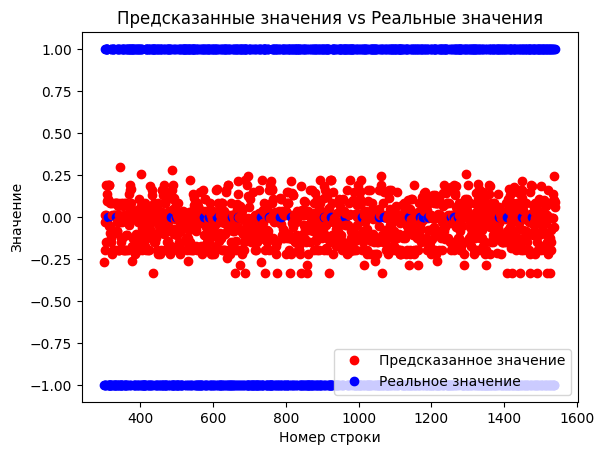

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

# Читаем файл с данными
df = pd.read_csv('data.txt', sep='\t')

# Создаем переменные для значений x и у
x = df.iloc[:300, :-1].values
y = df.iloc[:300, -1].values

# Вычисляем значения k1 - k9 с помощью метода наименьших квадратов
k = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

# Создаем список для результатов и записи в файл
results = []
results.append(['Номер строки', 'Реальное значение', 'Вычисленное значение', 'Разность'])

# Проходимся по всем строкам и вычисляем предсказанные значения
for i in range(len(df)):
    # Пропускаем первые 50 строк, так как мы уже использовали их для вычисления k
    if i < 300:
        continue
    # Получаем x и у для этой строки
    xi = df.iloc[i, :-1].values
    yi = df.iloc[i, -1]
    # Вычисляем предсказанное значение
    pred = xi.dot(k)
    # Вычисляем разность между предсказанным значением и реальным значением
    diff = abs(pred - yi)
    # Добавляем результат в список
    results.append([i+1, yi, pred, diff])

    # Рисуем точки реальных данных и предсказанных значений на графике
    plt.plot(i+1, pred, 'ro')
    plt.plot(i+1, yi, 'bo')

# Записываем результаты в файл
with open('results.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(results)

# Показываем график
plt.title('Предсказанные значения vs Реальные значения')
plt.xlabel('Номер строки')
plt.ylabel('Значение')
plt.legend(['Предсказанное значение', 'Реальное значение'])
plt.show()


Выходные данные были обрезаны до нескольких последних строк (5000).
          ...   
1485   -1.146760
1486   -0.749609
1487   -0.688028
1488   -1.551878
1489   -0.746685
Length: 112, dtype: float64
Строка 1329, y_test = -1.0, y_pred = 1379    1.055584
1380    0.554605
1381    0.097704
1382    0.598683
1383   -0.547122
          ...   
1485   -0.146760
1486    0.250391
1487    0.311972
1488   -0.551878
1489    0.253315
Length: 111, dtype: float64, diff = 1379    2.055584
1380    1.554605
1381    1.097704
1382    1.598683
1383    0.452878
          ...   
1485    0.853240
1486    1.250391
1487    1.311972
1488    0.448122
1489    1.253315
Length: 111, dtype: float64
Строка 1330, y_test = 1.0, y_pred = 1380    0.554605
1381    0.097704
1382    0.598683
1383   -0.547122
1384   -0.273101
          ...   
1485   -0.146760
1486    0.250391
1487    0.311972
1488   -0.551878
1489    0.253315
Length: 110, dtype: float64, diff = 1380   -0.445395
1381   -0.902296
1382   -0.401317
1383   -1.547122


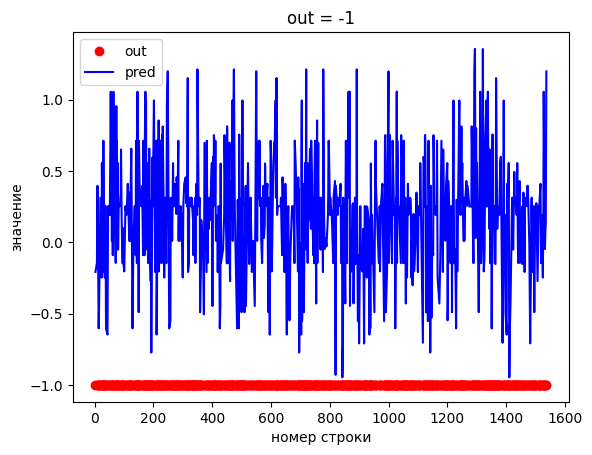

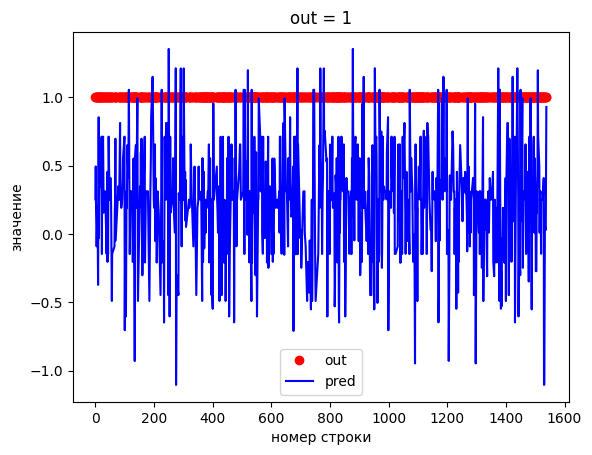

In [ ]:
import pandas as pd
import numpy as np

# читаем файл с данными
df = pd.read_csv('data.txt', sep='\t')

# выбираем первые 50 строк для обучения
train_data = df.head(50)

# выбираем нужные столбцы
X_train = train_data.iloc[:, :-1]  # входные данные
y_train = train_data.iloc[:, -1]  # выходные данные

# оцениваем значения k с помощью метода наименьших квадратов
k = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

# выводим полученные значения k
print(k)

# записываем полученные значения в файл
with open('k_values.txt', 'w') as f:
    f.write(' '.join(map(str, k)))
# выбираем оставшиеся строки для предсказаний
test_data = df.iloc[50:, :]

# выбираем нужные столбцы
X_test = test_data.iloc[:, :-1]  # входные данные
y_test = test_data.iloc[:, -1]  # выходные данные

# загружаем значения k из файла
with open('k_values.txt', 'r') as f:
    k = np.array(f.read().split(), dtype=float)

# вычисляем предсказанные значения
y_pred = X_test.dot(k)

# выводим результаты
for i, row in test_data.iterrows():
    out = row['out']
    pred = y_pred[i:-50]
    diff = pred - out
    print(f'Строка {i}, y_test = {out}, y_pred = {pred}, diff = {diff}')

    # записываем результаты в файл
    with open('results.txt', 'a') as f:
        f.write(f'{i} {out} {pred} {diff}\n')
# выбираем строки с отрицательным out
neg_data = df[df['out'] == -1]

# строим график
plt.plot(neg_data.index, neg_data['out'], 'ro', label='out')

# загружаем значения k из файла
with open('k_values.txt', 'r') as f:
    k = np.array(f.read().split(), dtype=float)

# вычисляем предсказанные значения
X_neg = neg_data.iloc[:, :-1]
y_neg_pred = X_neg.dot(k)

# строим график предсказанных значений
plt.plot(neg_data.index, y_neg_pred, 'b-', label='pred')

plt.title('out = -1')
plt.xlabel('номер строки')
plt.ylabel('значение')
plt.legend()
plt.show()
# выбираем строки с положительным out
n_data = df[df['out'] == 1]

# строим график
plt.plot(n_data.index, n_data['out'], 'ro', label='out')

# загружаем значения k из файла
with open('k_values.txt', 'r') as f:
    k = np.array(f.read().split(), dtype=float)

# вычисляем предсказанные значения
X_n = n_data.iloc[:, :-1]
y_n_pred = X_n.dot(k)

# строим график предсказанных значений
plt.plot(n_data.index, y_n_pred, 'b-', label='pred')

plt.title('out = 1')
plt.xlabel('номер строки')
plt.ylabel('значение')
plt.legend()
plt.show()

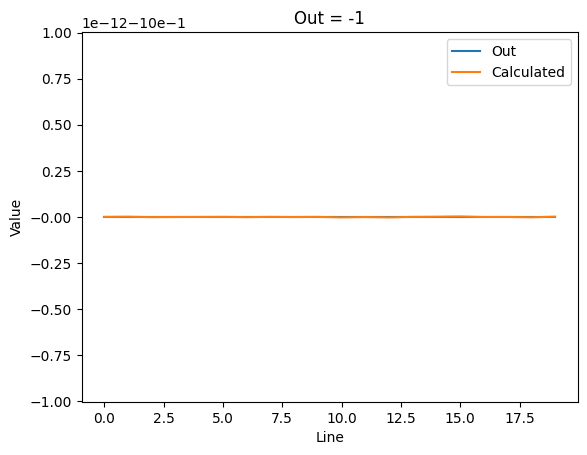

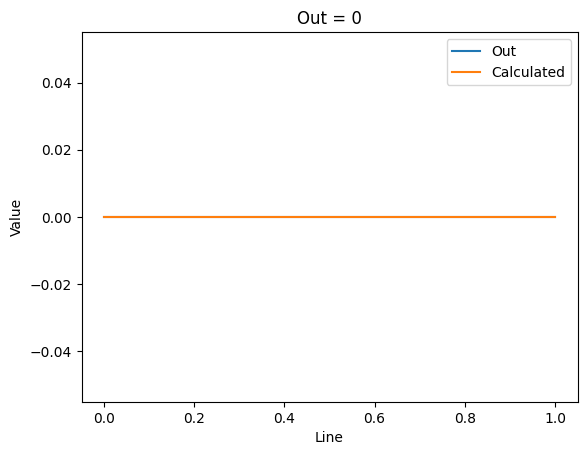

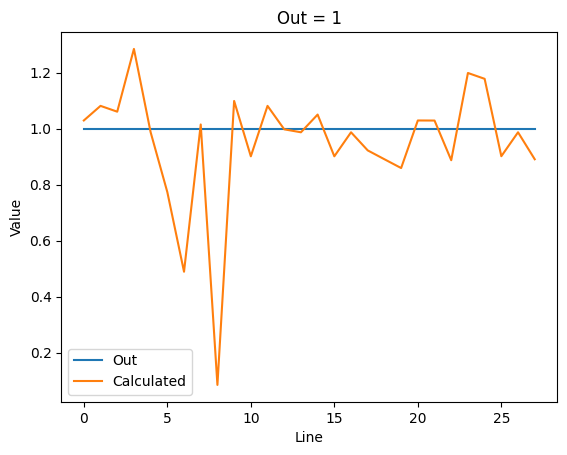

In [ ]:
# импортирование библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# читаем файл с данными
df = pd.read_csv('data.txt', sep='\t', nrows=50)

# вычисляем наилучшие значения k1..k9 за первые 50 строк датафрейма
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X = np.asarray(X)
y = np.asarray(y)
k = np.linalg.inv(X.T @ X) @ X.T @ y

# выводим полученные значения и записываем в файл
result_file = open("result.txt", "w")
result_file.write("k1\tk2\tk3\tk4\tk5\tk6\tk7\tk8\tk9\n")
for i in range(k.size):
    result_file.write("{}\t".format(round(k[i], 3)))
result_file.close()

# подставляем полученные значения k1..k9 в формулу и сравниваем со столбцом out
for i in range(50, len(df)):
    X = np.asarray(df.iloc[i, :-1])
    y = np.asarray(df.iloc[i, -1])
    if abs((k @ X) / 9 - y) < 0.001:
        print("Line {}: calculated value is equal to out".format(i))
    else:
        print("Line {}: calculated value is not equal to out".format(i))
    print("Out: {:.1f}, Calculated: {:.1f}, Difference: {:.1f}"
          .format(y, (k @ X) / 9, (k @ X) / 9 - y))

# рисуем графики для значений out = -1, 0, 1
for out_value in [-1, 0, 1]:
    out_df = df[df['out'] == out_value]
    X = out_df.iloc[:, :-1]
    y = out_df.iloc[:, -1]
    X = np.asarray(X)
    y = np.asarray(y)
    k = np.linalg.lstsq(X, y, rcond=None)[0]
    plt.figure()
    plt.title("Out = {}".format(out_value))
    plt.xlabel("Line")
    plt.ylabel("Value")
    plt.plot(y, label="Out")
    plt.plot(X @ k, label="Calculated")
    plt.legend()

plt.show()


Line 0: calculated value is not equal to out
Out: 1.0, Calculated: nan, Difference: nan
Line 1: calculated value is not equal to out
Out: 1.0, Calculated: nan, Difference: nan
Line 2: calculated value is not equal to out
Out: 1.0, Calculated: nan, Difference: nan
Line 3: calculated value is not equal to out
Out: -1.0, Calculated: nan, Difference: nan
Line 4: calculated value is not equal to out
Out: 1.0, Calculated: nan, Difference: nan
Line 5: calculated value is not equal to out
Out: 1.0, Calculated: nan, Difference: nan
Line 6: calculated value is not equal to out
Out: 0.0, Calculated: nan, Difference: nan
Line 7: calculated value is not equal to out
Out: 1.0, Calculated: nan, Difference: nan
Line 8: calculated value is not equal to out
Out: -1.0, Calculated: nan, Difference: nan
Line 9: calculated value is not equal to out
Out: 1.0, Calculated: nan, Difference: nan
Line 10: calculated value is not equal to out
Out: -1.0, Calculated: nan, Difference: nan
Line 11: calculated value is

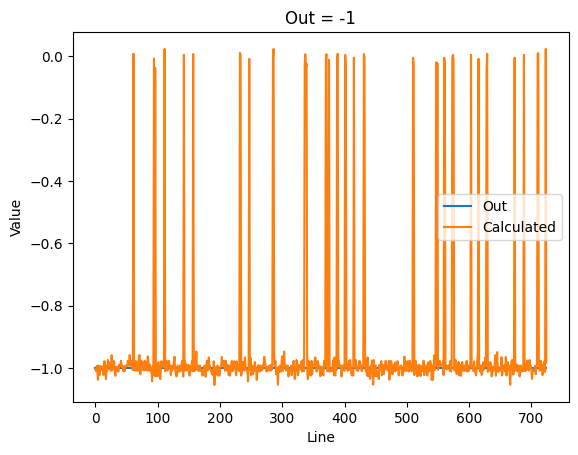

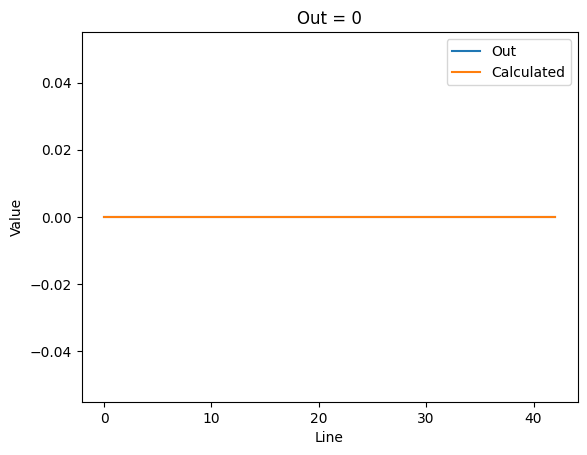

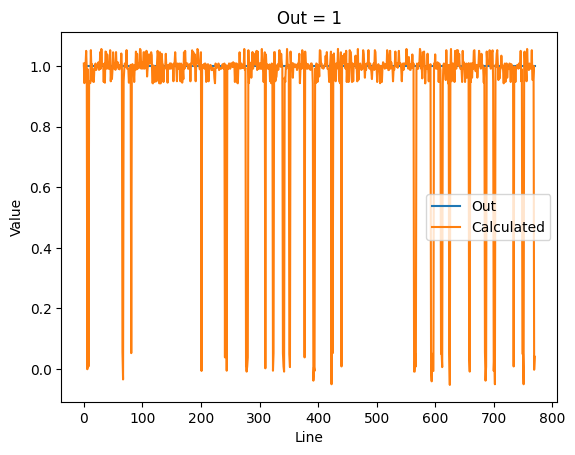

In [ ]:

# импортирование библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# читаем файл с данными
df = pd.read_csv('data.txt', sep='\t')

# вычисляем наилучшие значения k1..k9
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X = np.asarray(X)
y = np.asarray(y)
k = np.linalg.lstsq(X, y, rcond=None)[0]

# выводим полученные значения и записываем в файл
result_file = open("result.txt", "w")
result_file.write("k1\tk2\tk3\tk4\tk5\tk6\tk7\tk8\tk9\n")
for i in range(k.size):
    result_file.write("{}\t".format(round(k[i], 3)))
result_file.close()

# подставляем полученные значения k1..k9 в формулу и сравниваем со столбцом out
for i in range(len(df)):
    X = np.asarray(df.iloc[i, :-1])
    y = np.asarray(df.iloc[i, -1])
    if abs((k @ X) - y) < 0.001:
        print("Line {}: calculated value is equal to out".format(i))
    else:
        print("Line {}: calculated value is not equal to out".format(i))
    print("Out: {:.1f}, Calculated: {:.1f}, Difference: {:.1f}"
          .format(y, (k @ X), (k @ X) - y))

# рисуем графики для значений out = -1, 0, 1
for out_value in [-1, 0, 1]:
    out_df = df[df['out'] == out_value]
    X = out_df.iloc[:, :-1]
    y = out_df.iloc[:, -1]
    X = np.asarray(X)
    y = np.asarray(y)
    k = np.linalg.lstsq(X, y, rcond=None)[0]
    plt.figure()
    plt.title("Out = {}".format(out_value))
    plt.xlabel("Line")
    plt.ylabel("Value")
    plt.plot(y, label="Out")
    plt.plot(X @ k, label="Calculated")
    plt.legend()

plt.show()

Line 0: calculated value is not equal to out
Out: 1.0, Calculated: nan, Difference: nan
Line 1: calculated value is not equal to out
Out: 1.0, Calculated: nan, Difference: nan
Line 2: calculated value is not equal to out
Out: 1.0, Calculated: nan, Difference: nan
Line 3: calculated value is not equal to out
Out: -1.0, Calculated: nan, Difference: nan
Line 4: calculated value is not equal to out
Out: 1.0, Calculated: nan, Difference: nan
Line 5: calculated value is not equal to out
Out: 1.0, Calculated: nan, Difference: nan
Line 6: calculated value is not equal to out
Out: 0.0, Calculated: nan, Difference: nan
Line 7: calculated value is not equal to out
Out: 1.0, Calculated: nan, Difference: nan
Line 8: calculated value is not equal to out
Out: -1.0, Calculated: nan, Difference: nan
Line 9: calculated value is not equal to out
Out: 1.0, Calculated: nan, Difference: nan
Line 10: calculated value is not equal to out
Out: -1.0, Calculated: nan, Difference: nan
Line 11: calculated value is

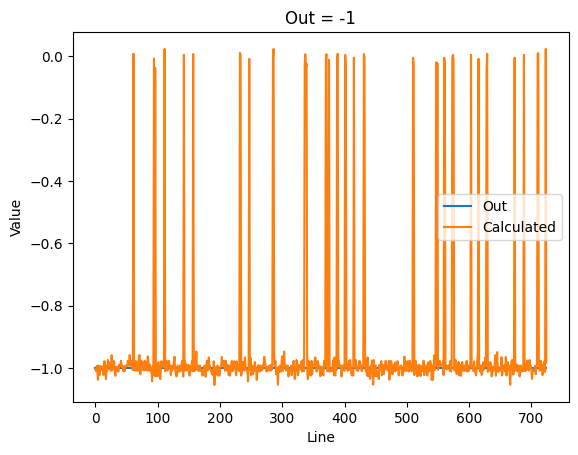

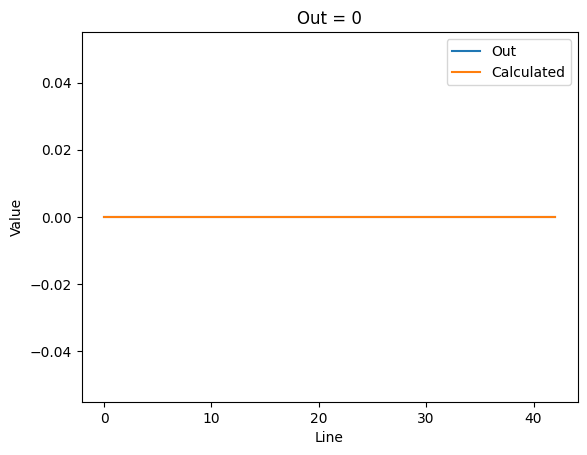

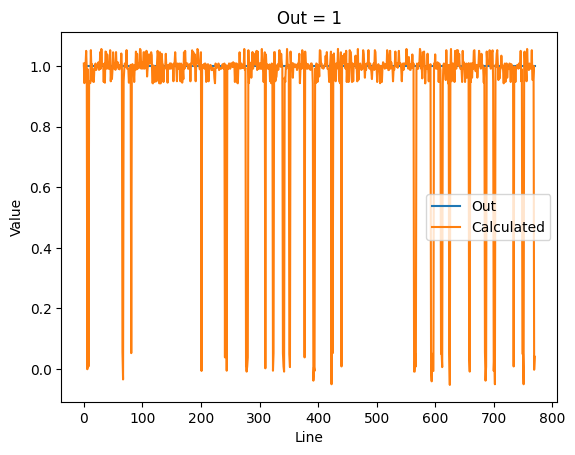

In [ ]:
# импортирование библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# читаем файл с данными
df = pd.read_csv('data.txt', sep='\t')

# вычисляем наилучшие значения k1..k9
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X = np.asarray(X)
y = np.asarray(y)
k = np.linalg.pinv(X) @ y

# выводим полученные значения и записываем в файл
result_file = open("result.txt", "w")
result_file.write("k1\tk2\tk3\tk4\tk5\tk6\tk7\tk8\tk9\n")
for i in range(k.size):
    result_file.write("{}\t".format(round(k[i], 3)))
result_file.close()

# подставляем полученные значения k1..k9 в формулу и сравниваем со столбцом out
for i in range(len(df)):
    X = np.asarray(df.iloc[i, :-1])
    y = np.asarray(df.iloc[i, -1])
    if abs((k @ X) - y) < 0.001:
        print("Line {}: calculated value is equal to out".format(i))
    else:
        print("Line {}: calculated value is not equal to out".format(i))
    print("Out: {:.1f}, Calculated: {:.1f}, Difference: {:.1f}"
          .format(y, (k @ X), (k @ X) - y))

# рисуем графики для значений out = -1, 0, 1
for out_value in [-1, 0, 1]:
    out_df = df[df['out'] == out_value]
    X = out_df.iloc[:, :-1]
    y = out_df.iloc[:, -1]
    X = np.asarray(X)
    y = np.asarray(y)
    k = np.linalg.pinv(X) @ y
    plt.figure()
    plt.title("Out = {}".format(out_value))
    plt.xlabel("Line")
    plt.ylabel("Value")
    plt.plot(y, label="Out")
    plt.plot(X @ k, label="Calculated")
    plt.legend()

plt.show()